### Tips:

* Review the numbers. Generating the summary statistics is not enough. Take a moment
to pause, read and really think about the numbers you are seeing.

* Ask why. Review your numbers and ask a lot of questions. How and why are you seeing
specic numbers. Think about how the numbers relate to the problem domain in general
and specic entities that observations relate to.

* Write down ideas. Write down your observations and ideas.

In [2]:
# View first 20 rows
from pandas import read_csv
data = read_csv('https://oml-data.s3.amazonaws.com/kaggle-give-me-credit-train.csv', index_col=0)
peek = data.head(20)
print(peek)

    RevolvingUtilizationOfUnsecuredLines  age  \
1                               0.766127   45   
2                               0.957151   40   
3                               0.658180   38   
4                               0.233810   30   
5                               0.907239   49   
6                               0.213179   74   
7                               0.305682   57   
8                               0.754464   39   
9                               0.116951   27   
10                              0.189169   57   
11                              0.644226   30   
12                              0.018798   51   
13                              0.010352   46   
14                              0.964673   40   
15                              0.019657   76   
16                              0.548458   64   
17                              0.061086   78   
18                              0.166284   53   
19                              0.221813   43   
20                  

In [3]:
# Dimensions of your data
shape = data.shape
print(shape)

(150000, 11)


In [4]:
# Data Types for Each Attribute
types = data.dtypes
print(types)

RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
SeriousDlqin2yrs                          int64
dtype: object


In [5]:
# Statistical Summary for each column: it helps to review all datas
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
description = data.describe()
print(description)

       RevolvingUtilizationOfUnsecuredLines         age  NumberOfTime30-59DaysPastDueNotWorse  \
count                            150000.000  150000.000                            150000.000   
mean                                  6.048      52.295                                 0.421   
std                                 249.755      14.772                                 4.193   
min                                   0.000       0.000                                 0.000   
25%                                   0.030      41.000                                 0.000   
50%                                   0.154      52.000                                 0.000   
75%                                   0.559      63.000                                 0.000   
max                               50708.000     109.000                                98.000   

        DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count  150000.000      1.203e+05

In [7]:
# Just for classification data
# Class Distribution: to have a quick idea of the distribution

class_counts = data.groupby('SeriousDlqin2yrs').size()
print(class_counts)

SeriousDlqin2yrs
0    139974
1     10026
dtype: int64


In [8]:
# Pairwise Pearson correlations: correlation between all pairs of attributes

set_option('display.width', 100)
set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

                                      RevolvingUtilizationOfUnsecuredLines    age  \
RevolvingUtilizationOfUnsecuredLines                                 1.000 -0.006   
age                                                                 -0.006  1.000   
NumberOfTime30-59DaysPastDueNotWorse                                -0.001 -0.063   
DebtRatio                                                            0.004  0.024   
MonthlyIncome                                                        0.007  0.038   
NumberOfOpenCreditLinesAndLoans                                     -0.011  0.148   
NumberOfTimes90DaysLate                                             -0.001 -0.061   
NumberRealEstateLoansOrLines                                         0.006  0.033   
NumberOfTime60-89DaysPastDueNotWorse                                -0.001 -0.057   
NumberOfDependents                                                   0.002 -0.213   
SeriousDlqin2yrs                                                 

In [9]:
# Pairwise Pearson correlations

skew = data.skew()
print(skew)

# The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

RevolvingUtilizationOfUnsecuredLines     97.632
age                                       0.189
NumberOfTime30-59DaysPastDueNotWorse     22.597
DebtRatio                                95.158
MonthlyIncome                           114.040
NumberOfOpenCreditLinesAndLoans           1.215
NumberOfTimes90DaysLate                  23.087
NumberRealEstateLoansOrLines              3.482
NumberOfTime60-89DaysPastDueNotWorse     23.332
NumberOfDependents                        1.588
SeriousDlqin2yrs                          3.469
dtype: float64


If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric.
A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.
A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

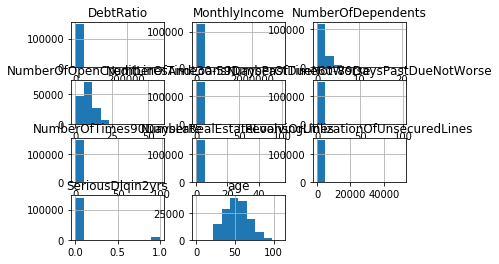

In [12]:
# Univariate Histograms

from matplotlib import pyplot

data.hist()
pyplot.show()

# The age is nearly a Gaussian distribution
# Nb of dependents may ahve an exponential distribution

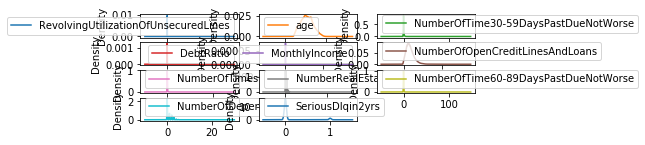

In [28]:
# Univariate Density Plots

data.plot(kind='density', subplots=True, layout=(8,3), sharex=False)
pyplot.show()

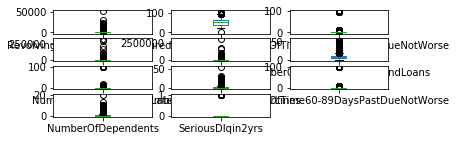

In [27]:
# Box and Whisker Plots

data.plot(kind='box', subplots=True, sharex=False, layout=(8,3), sharey=False)
pyplot.show()

Boxplots summarize the distribution of each attribute, drawing a line for
the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of
the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers
show candidate outlier values (values that are 1.5 times greater than the size of spread of the
middle 50% of the data).

Interactions between multiple variables:
    * Correlation Matrix Plot.
    * Scatter Plot Matrix.

Correlation matrix:gives an indication of how related the changes are between two variables.

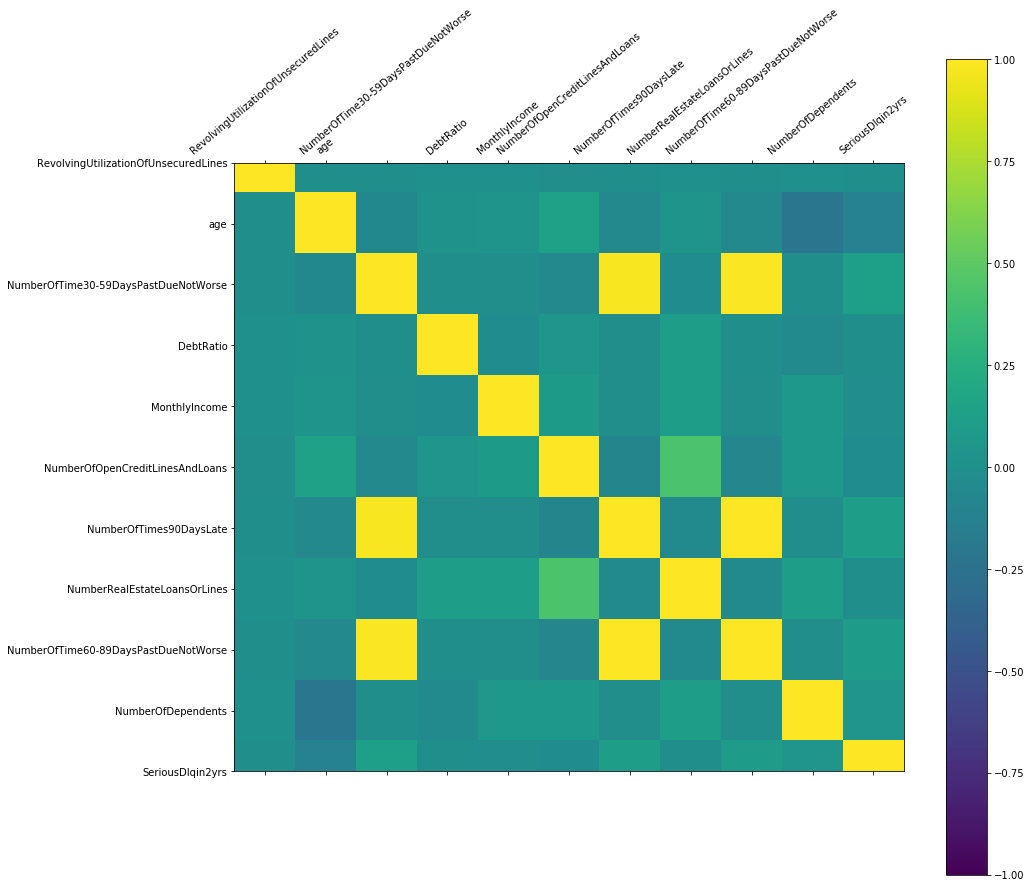

In [6]:
#Correlation matrix: correlation between each pair of attributes 
import numpy
from matplotlib import pyplot

correlations = data.corr()

# plot correlation matrix
fig = pyplot.figure(figsize=(15, 15))
ax = fig.add_subplot(111) #parameters encoded as a single integer: "111" means "1x1 grid; "234" means "2x3 grid"
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data, rotation=40)
ax.set_yticklabels(data)
pyplot.show()

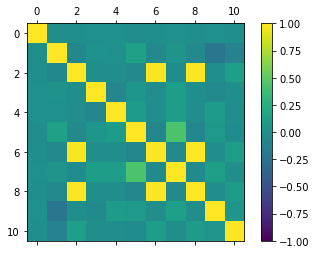

In [66]:
# Correction Matrix Plot (generic)
import numpy
from matplotlib import pyplot
correlations = data.corr()

# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

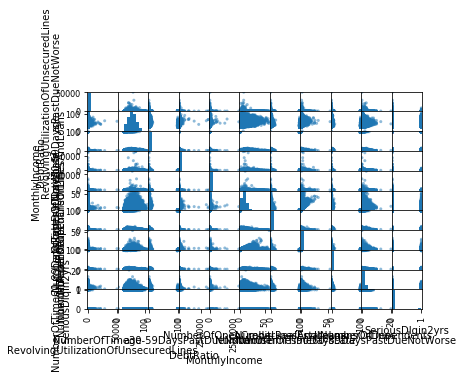

In [72]:
# Scatterplot Matrix
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

scatter_matrix(data)
pyplot.show()

In [57]:
# Rescale data (between 0 and 1)

from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data.values

# separate array into input and output components
X = array[:,0:10]
Y = array[:,10]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[1.511e-05 4.128e-01 2.041e-02 2.436e-06 3.031e-03 2.241e-01 0.000e+00
  1.111e-01 0.000e+00 1.000e-01]
 [1.888e-05 3.670e-01 0.000e+00 3.697e-07 8.641e-04 6.897e-02 0.000e+00
  0.000e+00 0.000e+00 5.000e-02]
 [1.298e-05 3.486e-01 1.020e-02 2.582e-07 1.011e-03 3.448e-02 1.020e-02
  0.000e+00 0.000e+00 0.000e+00]
 [4.611e-06 2.752e-01 0.000e+00 1.094e-07 1.097e-03 8.621e-02 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [1.789e-05 4.495e-01 1.020e-02 7.561e-08 2.113e-02 1.207e-01 0.000e+00
  1.852e-02 0.000e+00 0.000e+00]]


Standardization is a useful technique to transform attributes with a Gaussian distribution and
diering means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1.

In [58]:
# Standardize data (0 mean, 1 stdev)

from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler

array = data.values

# separate array into input and output components
X = array[:,0:10]
Y = array[:,10]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-0.021 -0.494  0.377 -0.173  0.17   0.884 -0.064  4.41  -0.058  1.115]
 [-0.02  -0.832 -0.1   -0.173 -0.283 -0.865 -0.064 -0.901 -0.058  0.218]
 [-0.022 -0.968  0.138 -0.173 -0.252 -1.254  0.176 -0.901 -0.058 -0.679]
 [-0.023 -1.509 -0.1   -0.173 -0.234 -0.671 -0.064 -0.901 -0.058 -0.679]
 [-0.021 -0.223  0.138 -0.173  3.957 -0.282 -0.064 -0.016 -0.058 -0.679]]


The values for each attribute now have a mean value of 0 and a standard deviation of 1.

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra).

In [61]:
# required for the normalization and binarization setp
data.fillna(0,inplace=True)
print(data)

        RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  \
1                                      0.766   45                                     2   
2                                      0.957   40                                     0   
3                                      0.658   38                                     1   
4                                      0.234   30                                     0   
5                                      0.907   49                                     1   
...                                      ...  ...                                   ...   
149996                                 0.041   74                                     0   
149997                                 0.300   44                                     0   
149998                                 0.246   58                                     0   
149999                                 0.000   30                                     0   

In [62]:
# Normalize data (length of 1)
from numpy import set_printoptions
from sklearn.preprocessing import Normalizer
array = data.values

# separate array into input and output components
X = array[:,0:10]
Y = array[:,10]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[8.400e-05 4.934e-03 2.193e-04 8.805e-05 1.000e+00 1.425e-03 0.000e+00
  6.579e-04 0.000e+00 2.193e-04]
 [3.681e-04 1.538e-02 0.000e+00 4.687e-05 9.999e-01 1.538e-03 0.000e+00
  0.000e+00 0.000e+00 3.846e-04]
 [2.163e-04 1.249e-02 3.287e-04 2.798e-05 9.999e-01 6.574e-04 3.287e-04
  0.000e+00 0.000e+00 0.000e+00]
 [7.085e-05 9.091e-03 0.000e+00 1.092e-05 1.000e+00 1.515e-03 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [1.427e-05 7.706e-04 1.573e-05 3.920e-07 1.000e+00 1.101e-04 0.000e+00
  1.573e-05 0.000e+00 0.000e+00]]


The rows are normalized to length 1.

In [64]:
# binarization
from sklearn.preprocessing import Binarizer
array = data.values

# separate array into input and output components
X = array[:,0:10]
Y = array[:,10]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 1. 1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 1. 0. 0.]]
